# Classic machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns


===== Logistic Regression =====
Accuracy: 0.9622823984526112
Precision: 0.9206349206349206


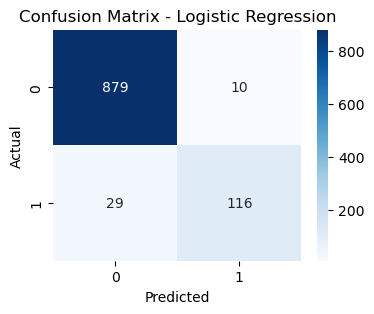


===== Decision Tree =====
Accuracy: 0.9545454545454546
Precision: 0.9803921568627451


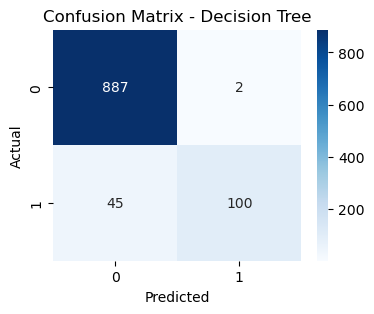


===== XGBoost =====
Accuracy: 0.9796905222437138
Precision: 0.9769230769230769


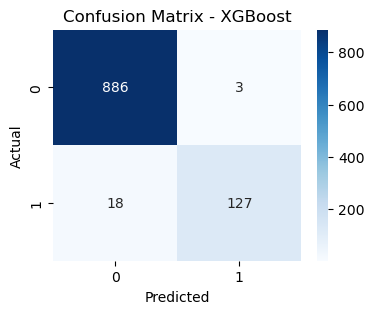


===== Gradient Boosting =====
Accuracy: 0.9709864603481625
Precision: 0.9831932773109243


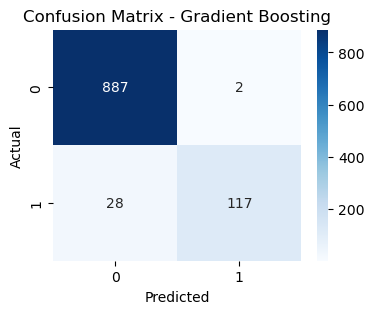

{'Logistic Regression': {'accuracy': 0.9622823984526112,
  'precision': 0.9206349206349206},
 'Decision Tree': {'accuracy': 0.9545454545454546,
  'precision': 0.9803921568627451},
 'XGBoost': {'accuracy': 0.9796905222437138, 'precision': 0.9769230769230769},
 'Gradient Boosting': {'accuracy': 0.9709864603481625,
  'precision': 0.9831932773109243}}

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unused columns
df = df[['v1','v2']]
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Remove duplicates
df = df.drop_duplicates()

def clean_text(text):
    text = text.lower()
    return "".join([ch if ch.isalnum() else " " for ch in text])

df['transformed_text'] = df['text'].apply(clean_text)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
clfs = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss"),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in clfs.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Precision:", prec)

    # Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results[name] = {"accuracy": acc, "precision": prec}

results

# Bert Model

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

^C


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\ninac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.1 MB 10.9 MB/s eta 0:00:01
     ------ --------------------------------- 1.0/6.1 MB 10.8 MB/s eta 0:00:01
     ----------- ---------------------------- 1.7/6.1 MB 12.0 MB/s eta 0:00:01
     --------------- ------------------------ 2.3/6.1 MB 12.4 MB/s eta 0:00:01
     ------------------- -------------------- 3.0/6.1 MB 12.8 MB/s eta 0:00:01
     ----------------------- ---------------- 3.6/6.1 MB 12.8 MB/s eta 0:00:01
     ---------------------------- ----------- 4.4/6.1 MB 13.2 MB/s eta 0:00:01
     --------------------------------- ------ 5.0/6.1 MB 14.0 MB/s eta 0:00:01
     ------------------------------------- -- 5.7/6.1 MB 13.4 MB/s eta 0:00:01
     ---------------------------------------- 6.1/6.1 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ----

: 

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [15]:
df = pd.read_csv('spam.csv', encoding="latin-1")

# changing spam classification to numeric: 0 for not spam, 1 for spam
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

## Prepare Dataset
- tokenizing the dataset
- padding the tokens
- tell model to ignore the padded values (aka masking)

In [16]:
tokenized = df['v2'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

print("Padded array shape:")
print(np.array(padded).shape)

attention_mask = np.where(padded != 0, 1, 0)
print("Masked data shape:")
print(attention_mask.shape)

Padded array shape:
(5572, 238)
Masked data shape:
(5572, 238)


## Using Bert
- logistic regression

In [17]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

KeyboardInterrupt: 